In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

np.random.seed(1)
tf.random.set_seed(1)

## Collect and prepare data for analysis

In [2]:
df = pd.read_csv('C:/Users/suman/Downloads/NKE.csv',  parse_dates=True)

In [3]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [4]:
df = df[['Close']]  # watch the spaces in the column name 

In [5]:
df

,Close
0,66.879997
1,66.970001
2,66.669998
3,68.050003
4,69.559998
...,...
1253,125.949997
1254,126.190002
1255,126.209999
1256,125.669998


In [6]:
df['Close'].isna().sum()

0

In [7]:
row_count = df.shape[0] # store the number of obersvations (daily temperature readings)
row_count

1258

In [8]:
temps = df.to_numpy() # to make things easier, we create a numpy array from our dataframe of temperatures
temps.shape

(1258, 1)

In [9]:
sequence_length = 10  # here, I create a variable to hold the number of days that will be in a sequence. This makes it easier to change later.

In [10]:
temps = temps[row_count % sequence_length: ] # Since our data may not be a multiple of sequence_length, we will ignore 
# the first number of days in order to make the total a number divisible by sequence length
temps.shape

(1250, 1)

In [11]:
temps = temps.reshape(row_count // sequence_length, sequence_length) # note that temps are a multiple of sequence length, we can split the data into rows of sequence length.
temps

array([[ 66.900002,  68.099998,  69.339996, ...,  68.839996,  69.5     ,
         71.339996],
       [ 70.940002,  71.32    ,  71.379997, ...,  70.919998,  72.230003,
         71.800003],
       [ 72.760002,  73.830002,  74.050003, ...,  74.290001,  74.110001,
         74.699997],
       ...,
       [117.870003, 117.489998, 116.860001, ..., 121.199997, 125.610001,
        119.5     ],
       [120.970001, 120.709999, 117.809998, ..., 121.669998, 123.690002,
        120.900002],
       [120.220001, 121.910004, 123.300003, ..., 126.209999, 125.669998,
        124.449997]])

In [12]:
# we can now see that our days have been organized into rows of sequence length. 

In [13]:
# create our X and y. 
# X will be the 59 days prior...
X = temps[:, :-1] # all rows, all columns except the last one
# y will be the 60th day (what we are trying to predict)
y = temps[:, -1] # all rows, only the last column

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [15]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

print(X_train.shape)
print(X_test.shape)

(87, 9, 1)
(38, 9, 1)


In [16]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, SimpleRNN, GRU, Conv1D

n_steps = sequence_length - 1
n_inputs = 1

model = Sequential(
    [
        SimpleRNN(100, input_shape=[n_steps, n_inputs]),
        Dense(1, activation=None)
    ]
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 100)               10200     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 10,301
Trainable params: 10,301
Non-trainable params: 0
_________________________________________________________________


In [17]:
# If multiclass, use "sparse_categorical_crossentropy" as the loss function
model.compile(
    loss="mean_squared_error", 
    optimizer=tf.keras.optimizers.Nadam(learning_rate=0.001), 
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [18]:
from tensorflow.keras.callbacks import EarlyStopping

import time
start_time = time.time()

early_stop = EarlyStopping(monitor='val_root_mean_squared_error', min_delta = 0.0, patience=10, verbose=1, mode='min')

history = model.fit(
    X_train, 
    y_train, 
    epochs=600,
    validation_data=(X_test, y_test), 
    callbacks=[early_stop]
)

end_time = time.time()

Epoch 1/600
3/3 [==============================] - 1s 165ms/step - loss: 12637.9795 - root_mean_squared_error: 112.4188 - val_loss: 12911.8643 - val_root_mean_squared_error: 113.6304
Epoch 2/600
3/3 [==============================] - 0s 16ms/step - loss: 12569.9180 - root_mean_squared_error: 112.1156 - val_loss: 12843.5283 - val_root_mean_squared_error: 113.3293
Epoch 3/600
3/3 [==============================] - 0s 18ms/step - loss: 12496.6562 - root_mean_squared_error: 111.7884 - val_loss: 12747.5693 - val_root_mean_squared_error: 112.9051
Epoch 4/600
3/3 [==============================] - 0s 16ms/step - loss: 12389.7568 - root_mean_squared_error: 111.3093 - val_loss: 12611.2842 - val_root_mean_squared_error: 112.3000
Epoch 5/600
3/3 [==============================] - 0s 16ms/step - loss: 12254.1494 - root_mean_squared_error: 110.6985 - val_loss: 12463.5918 - val_root_mean_squared_error: 111.6405
Epoch 6/600
3/3 [==============================] - 0s 16ms/step - loss: 12112.4541 - root

3/3 [==============================] - 0s 16ms/step - loss: 9290.9980 - root_mean_squared_error: 96.3898 - val_loss: 9470.9082 - val_root_mean_squared_error: 97.3186
Epoch 47/600
3/3 [==============================] - 0s 16ms/step - loss: 9239.1670 - root_mean_squared_error: 96.1206 - val_loss: 9417.3740 - val_root_mean_squared_error: 97.0432
Epoch 48/600
3/3 [==============================] - 0s 16ms/step - loss: 9187.3076 - root_mean_squared_error: 95.8504 - val_loss: 9363.9922 - val_root_mean_squared_error: 96.7677
Epoch 49/600
3/3 [==============================] - 0s 17ms/step - loss: 9135.8105 - root_mean_squared_error: 95.5814 - val_loss: 9310.7891 - val_root_mean_squared_error: 96.4924
Epoch 50/600
3/3 [==============================] - 0s 16ms/step - loss: 9084.8301 - root_mean_squared_error: 95.3144 - val_loss: 9258.0752 - val_root_mean_squared_error: 96.2189
Epoch 51/600
3/3 [==============================] - 0s 16ms/step - loss: 9033.8984 - root_mean_squared_error: 95.0468 

Epoch 92/600
3/3 [==============================] - 0s 16ms/step - loss: 7140.1040 - root_mean_squared_error: 84.4991 - val_loss: 7249.4927 - val_root_mean_squared_error: 85.1440
Epoch 93/600
3/3 [==============================] - 0s 16ms/step - loss: 7098.7134 - root_mean_squared_error: 84.2539 - val_loss: 7206.3760 - val_root_mean_squared_error: 84.8904
Epoch 94/600
3/3 [==============================] - 0s 16ms/step - loss: 7057.4097 - root_mean_squared_error: 84.0084 - val_loss: 7163.4917 - val_root_mean_squared_error: 84.6374
Epoch 95/600
3/3 [==============================] - 0s 16ms/step - loss: 7016.3169 - root_mean_squared_error: 83.7635 - val_loss: 7120.7861 - val_root_mean_squared_error: 84.3848
Epoch 96/600
3/3 [==============================] - 0s 16ms/step - loss: 6975.2627 - root_mean_squared_error: 83.5180 - val_loss: 7078.4595 - val_root_mean_squared_error: 84.1336
Epoch 97/600
3/3 [==============================] - 0s 16ms/step - loss: 6934.5903 - root_mean_squared_er

3/3 [==============================] - 0s 16ms/step - loss: 4164.1406 - root_mean_squared_error: 64.5302 - val_loss: 4149.4268 - val_root_mean_squared_error: 64.4160
Epoch 183/600
3/3 [==============================] - 0s 16ms/step - loss: 4138.7861 - root_mean_squared_error: 64.3334 - val_loss: 4122.9546 - val_root_mean_squared_error: 64.2102
Epoch 184/600
3/3 [==============================] - 0s 16ms/step - loss: 4114.1221 - root_mean_squared_error: 64.1414 - val_loss: 4096.5952 - val_root_mean_squared_error: 64.0046
Epoch 185/600
3/3 [==============================] - 0s 18ms/step - loss: 4089.1890 - root_mean_squared_error: 63.9468 - val_loss: 4070.5317 - val_root_mean_squared_error: 63.8007
Epoch 186/600
3/3 [==============================] - 0s 16ms/step - loss: 4064.3093 - root_mean_squared_error: 63.7519 - val_loss: 4044.6772 - val_root_mean_squared_error: 63.5978
Epoch 187/600
3/3 [==============================] - 0s 16ms/step - loss: 4040.1379 - root_mean_squared_error: 63.

3/3 [==============================] - 0s 16ms/step - loss: 2430.6560 - root_mean_squared_error: 49.3017 - val_loss: 2312.7781 - val_root_mean_squared_error: 48.0914
Epoch 273/600
3/3 [==============================] - 0s 14ms/step - loss: 2417.0471 - root_mean_squared_error: 49.1635 - val_loss: 2297.7903 - val_root_mean_squared_error: 47.9353
Epoch 274/600
3/3 [==============================] - 0s 16ms/step - loss: 2403.3738 - root_mean_squared_error: 49.0242 - val_loss: 2283.0010 - val_root_mean_squared_error: 47.7808
Epoch 275/600
3/3 [==============================] - 0s 16ms/step - loss: 2389.4968 - root_mean_squared_error: 48.8825 - val_loss: 2268.4172 - val_root_mean_squared_error: 47.6279
Epoch 276/600
3/3 [==============================] - 0s 18ms/step - loss: 2375.9080 - root_mean_squared_error: 48.7433 - val_loss: 2253.8679 - val_root_mean_squared_error: 47.4749
Epoch 277/600
3/3 [==============================] - 0s 16ms/step - loss: 2362.2949 - root_mean_squared_error: 48.

3/3 [==============================] - 0s 16ms/step - loss: 1522.9102 - root_mean_squared_error: 39.0245 - val_loss: 1323.0336 - val_root_mean_squared_error: 36.3735
Epoch 363/600
3/3 [==============================] - 0s 18ms/step - loss: 1516.0865 - root_mean_squared_error: 38.9370 - val_loss: 1315.4008 - val_root_mean_squared_error: 36.2685
Epoch 364/600
3/3 [==============================] - 0s 18ms/step - loss: 1509.4250 - root_mean_squared_error: 38.8513 - val_loss: 1307.7749 - val_root_mean_squared_error: 36.1632
Epoch 365/600
3/3 [==============================] - 0s 16ms/step - loss: 1502.5857 - root_mean_squared_error: 38.7632 - val_loss: 1300.2452 - val_root_mean_squared_error: 36.0589
Epoch 366/600
3/3 [==============================] - 0s 18ms/step - loss: 1495.8572 - root_mean_squared_error: 38.6763 - val_loss: 1292.7737 - val_root_mean_squared_error: 35.9552
Epoch 367/600
3/3 [==============================] - 0s 16ms/step - loss: 1489.1592 - root_mean_squared_error: 38.

Epoch 453/600
3/3 [==============================] - 0s 16ms/step - loss: 1013.4354 - root_mean_squared_error: 31.8345 - val_loss: 793.9272 - val_root_mean_squared_error: 28.1767
Epoch 454/600
3/3 [==============================] - 0s 18ms/step - loss: 1006.7244 - root_mean_squared_error: 31.7289 - val_loss: 792.2224 - val_root_mean_squared_error: 28.1464
Epoch 455/600
3/3 [==============================] - 0s 16ms/step - loss: 1001.1319 - root_mean_squared_error: 31.6407 - val_loss: 783.0729 - val_root_mean_squared_error: 27.9834
Epoch 456/600
3/3 [==============================] - 0s 18ms/step - loss: 997.0998 - root_mean_squared_error: 31.5769 - val_loss: 781.8365 - val_root_mean_squared_error: 27.9613
Epoch 457/600
3/3 [==============================] - 0s 16ms/step - loss: 993.8041 - root_mean_squared_error: 31.5247 - val_loss: 772.9660 - val_root_mean_squared_error: 27.8023
Epoch 458/600
3/3 [==============================] - 0s 16ms/step - loss: 984.8008 - root_mean_squared_erro

3/3 [==============================] - 0s 16ms/step - loss: 801.5544 - root_mean_squared_error: 28.3117 - val_loss: 593.4736 - val_root_mean_squared_error: 24.3613
Epoch 500/600
3/3 [==============================] - 0s 16ms/step - loss: 798.6883 - root_mean_squared_error: 28.2611 - val_loss: 590.8233 - val_root_mean_squared_error: 24.3069
Epoch 501/600
3/3 [==============================] - 0s 14ms/step - loss: 794.1721 - root_mean_squared_error: 28.1811 - val_loss: 586.7814 - val_root_mean_squared_error: 24.2236
Epoch 502/600
3/3 [==============================] - 0s 16ms/step - loss: 789.8689 - root_mean_squared_error: 28.1046 - val_loss: 582.6910 - val_root_mean_squared_error: 24.1390
Epoch 503/600
3/3 [==============================] - 0s 16ms/step - loss: 786.1067 - root_mean_squared_error: 28.0376 - val_loss: 579.1613 - val_root_mean_squared_error: 24.0658
Epoch 504/600
3/3 [==============================] - 0s 16ms/step - loss: 782.9240 - root_mean_squared_error: 27.9808 - val_

3/3 [==============================] - 0s 16ms/step - loss: 507.8918 - root_mean_squared_error: 22.5365 - val_loss: 337.6148 - val_root_mean_squared_error: 18.3743
Epoch 592/600
3/3 [==============================] - 0s 16ms/step - loss: 505.0895 - root_mean_squared_error: 22.4742 - val_loss: 335.6555 - val_root_mean_squared_error: 18.3209
Epoch 593/600
3/3 [==============================] - 0s 16ms/step - loss: 503.1371 - root_mean_squared_error: 22.4307 - val_loss: 333.3995 - val_root_mean_squared_error: 18.2592
Epoch 594/600
3/3 [==============================] - 0s 16ms/step - loss: 501.2025 - root_mean_squared_error: 22.3876 - val_loss: 331.2610 - val_root_mean_squared_error: 18.2006
Epoch 595/600
3/3 [==============================] - 0s 16ms/step - loss: 497.8952 - root_mean_squared_error: 22.3136 - val_loss: 329.3679 - val_root_mean_squared_error: 18.1485
Epoch 596/600
3/3 [==============================] - 0s 16ms/step - loss: 495.2709 - root_mean_squared_error: 22.2547 - val_

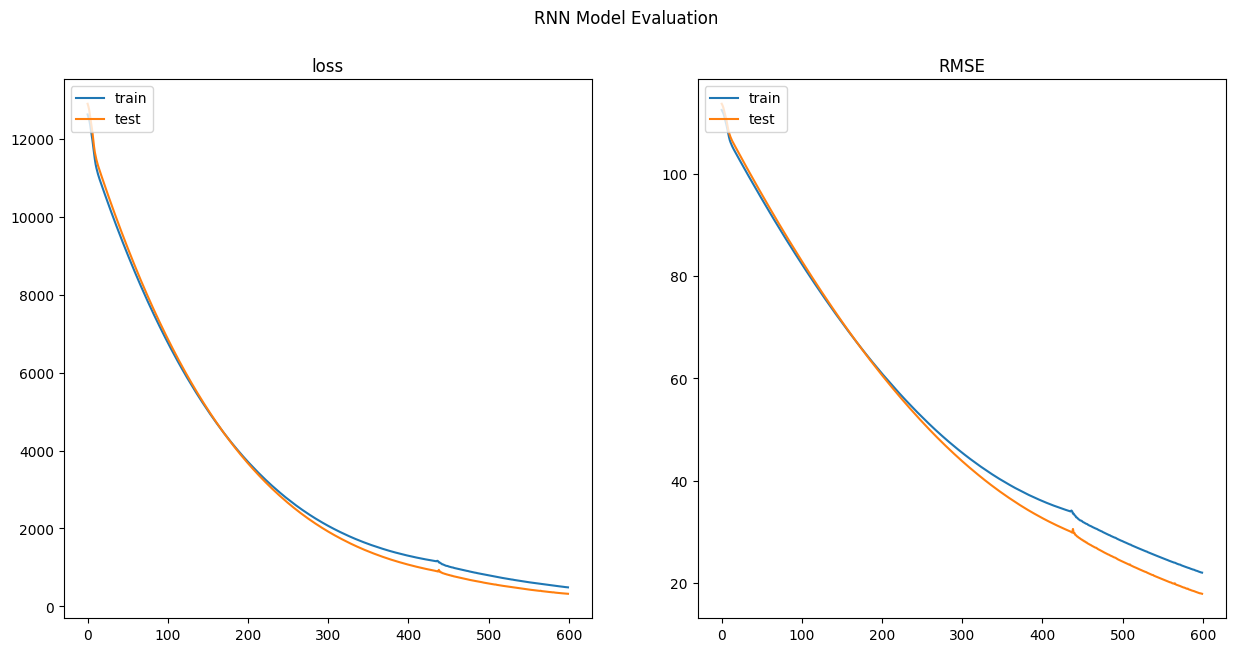

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))
fig.suptitle('RNN Model Evaluation')

ax1.set_title('loss')
#ax1.set_ylim(0, 100)
ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax1.legend(['train', 'test'], loc='upper left')

ax2.set_title('RMSE')
#ax2.set_ylim(0, 1)
ax2.plot(history.history['root_mean_squared_error'])
ax2.plot(history.history['val_root_mean_squared_error'])
ax2.legend(['train', 'test'], loc='upper left')

In [20]:
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_test)  # these predictions are probabilities (0-1) taken from the sigmoid function

mean_squared_error(y_test, y_pred)**0.5


2/2 [==============================] - 0s 4ms/step


17.933593747840376

In [21]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import mean_squared_error


# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# A normal (cross-sectional) NN

In [22]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[9, 1]),
    keras.layers.Dense(23, activation='relu'),
    keras.layers.Dense(1, activation=None)
    
])

model.compile(loss="mse", optimizer='Adam')

history = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
3/3 [==============================] - 0s 2ms/step - loss: 43935.5703
Epoch 2/100
3/3 [==============================] - 0s 0s/step - loss: 40092.9609
Epoch 3/100
3/3 [==============================] - 0s 2ms/step - loss: 36958.1016
Epoch 4/100
3/3 [==============================] - 0s 2ms/step - loss: 34022.3867
Epoch 5/100
3/3 [==============================] - 0s 2ms/step - loss: 31410.1445
Epoch 6/100
3/3 [==============================] - 0s 0s/step - loss: 28981.6543
Epoch 7/100
3/3 [==============================] - 0s 1ms/step - loss: 26640.9512
Epoch 8/100
3/3 [==============================] - 0s 2ms/step - loss: 24440.2188
Epoch 9/100
3/3 [==============================] - 0s 2ms/step - loss: 22444.5781
Epoch 10/100
3/3 [==============================] - 0s 2ms/step - loss: 20656.5312
Epoch 11/100
3/3 [==============================] - 0s 0s/step - loss: 19160.8242
Epoch 12/100
3/3 [==============================] - 0s 0s/step - loss: 17866.4570
Epoch 13/100
3/3 

In [23]:
#Predict:
y_pred = model.predict(X_test)

2/2 [==============================] - 0s 0s/step


In [24]:
mean_squared_error(y_test, y_pred)

21.07902371317661

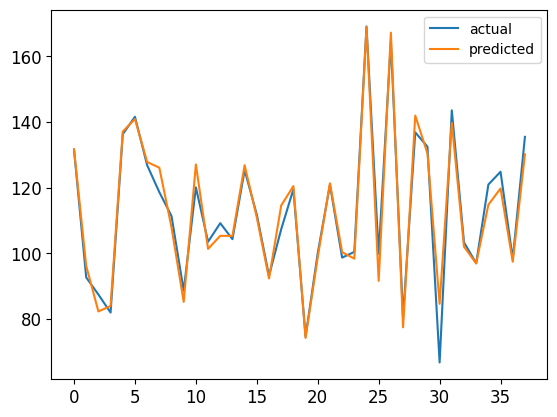

In [25]:
plt.plot(y_test, label = 'actual')
plt.plot(y_pred, label = 'predicted')

plt.legend()

plt.show()

Now, let's say our past 59 days of temperatures were as follow....

# LSTM with one layer

In [26]:
model = keras.models.Sequential([
    keras.layers.LSTM(32, activation='relu', input_shape=[9, 1]),
    keras.layers.Dense(1, activation=None)
])

In [27]:
np.random.seed(42)
tf.random.set_seed(42)

model.compile(loss="mse", optimizer='Adam')

history = model.fit(X_train, y_train, epochs=30)

Epoch 1/30
3/3 [==============================] - 1s 4ms/step - loss: 14166.8633
Epoch 2/30
3/3 [==============================] - 0s 4ms/step - loss: 13710.8818
Epoch 3/30
3/3 [==============================] - 0s 4ms/step - loss: 13209.6807
Epoch 4/30
3/3 [==============================] - 0s 2ms/step - loss: 12651.6045
Epoch 5/30
3/3 [==============================] - 0s 4ms/step - loss: 11989.0938
Epoch 6/30
3/3 [==============================] - 0s 4ms/step - loss: 11229.7842
Epoch 7/30
3/3 [==============================] - 0s 4ms/step - loss: 10283.7266
Epoch 8/30
3/3 [==============================] - 0s 4ms/step - loss: 9108.9336
Epoch 9/30
3/3 [==============================] - 0s 2ms/step - loss: 7608.1953
Epoch 10/30
3/3 [==============================] - 0s 4ms/step - loss: 4462.5156
Epoch 11/30
3/3 [==============================] - 0s 4ms/step - loss: 2375.0640
Epoch 12/30
3/3 [==============================] - 0s 4ms/step - loss: 1382.0771
Epoch 13/30
3/3 [=============

In [28]:
#Predict:
y_pred = model.predict(X_test)


2/2 [==============================] - 0s 0s/step


In [29]:
mean_squared_error(y_test, y_pred)

25.73319561181

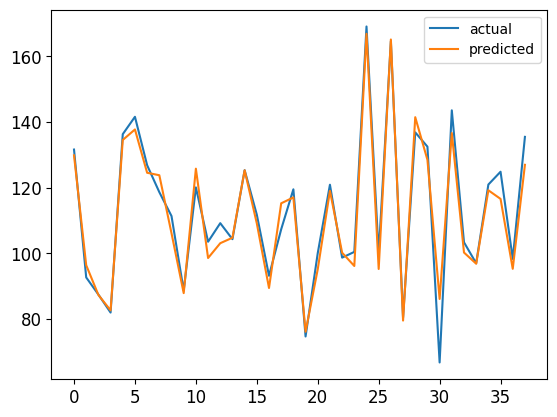

In [30]:
plt.plot(y_test, label = 'actual')
plt.plot(y_pred, label = 'predicted')

plt.legend()

plt.show()

# LSTM with more layers

In [31]:
model = keras.models.Sequential([
    keras.layers.LSTM(32, activation='tanh', return_sequences=True, input_shape=[9, 1]),
    keras.layers.LSTM(32, activation='tanh', return_sequences=False),
    keras.layers.Dense(1, activation=None)
])

In [32]:
np.random.seed(42)
tf.random.set_seed(42)

model.compile(loss="mse", optimizer='Adam')

history = model.fit(X_train, y_train, epochs=30)

Epoch 1/30
3/3 [==============================] - 2s 6ms/step - loss: 12837.1279
Epoch 2/30
3/3 [==============================] - 0s 6ms/step - loss: 12764.5947
Epoch 3/30
3/3 [==============================] - 0s 6ms/step - loss: 12687.5244
Epoch 4/30
3/3 [==============================] - 0s 8ms/step - loss: 12604.6699
Epoch 5/30
3/3 [==============================] - 0s 6ms/step - loss: 12513.1152
Epoch 6/30
3/3 [==============================] - 0s 6ms/step - loss: 12416.7891
Epoch 7/30
3/3 [==============================] - 0s 8ms/step - loss: 12315.3848
Epoch 8/30
3/3 [==============================] - 0s 6ms/step - loss: 12214.1670
Epoch 9/30
3/3 [==============================] - 0s 6ms/step - loss: 12115.9033
Epoch 10/30
3/3 [==============================] - 0s 6ms/step - loss: 12022.0479
Epoch 11/30
3/3 [==============================] - 0s 6ms/step - loss: 11931.7773
Epoch 12/30
3/3 [==============================] - 0s 8ms/step - loss: 11844.8721
Epoch 13/30
3/3 [========

In [33]:
#Predict:
y_pred = model.predict(X_test)

2/2 [==============================] - 1s 4ms/step


In [34]:
mean_squared_error(y_test, y_pred)

11013.313965599978

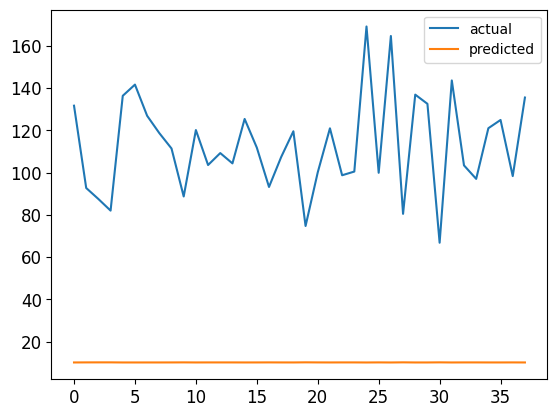

In [35]:
plt.plot(y_test, label = 'actual')
plt.plot(y_pred, label = 'predicted')

plt.legend()

plt.show()

# GRU (with more layers)

In [36]:
model = keras.models.Sequential([
    keras.layers.GRU(32, activation='relu', return_sequences=True, input_shape=[9, 1]),
    keras.layers.GRU(32, activation='relu', return_sequences=False),
    keras.layers.Dense(1, activation=None)
])

In [37]:
np.random.seed(42)
tf.random.set_seed(42)

model.compile(loss="mse", optimizer='RMSprop')

history = model.fit(X_train, y_train, epochs=30)

Epoch 1/30
3/3 [==============================] - 2s 8ms/step - loss: 14036.4023
Epoch 2/30
3/3 [==============================] - 0s 6ms/step - loss: 12346.8662
Epoch 3/30
3/3 [==============================] - 0s 8ms/step - loss: 11638.2754
Epoch 4/30
3/3 [==============================] - 0s 6ms/step - loss: 10920.8574
Epoch 5/30
3/3 [==============================] - 0s 6ms/step - loss: 9922.1426
Epoch 6/30
3/3 [==============================] - 0s 6ms/step - loss: 8771.5801
Epoch 7/30
3/3 [==============================] - 0s 6ms/step - loss: 7612.4219
Epoch 8/30
3/3 [==============================] - 0s 8ms/step - loss: 6374.1611
Epoch 9/30
3/3 [==============================] - 0s 4ms/step - loss: 5162.4282
Epoch 10/30
3/3 [==============================] - 0s 6ms/step - loss: 3733.3340
Epoch 11/30
3/3 [==============================] - 0s 6ms/step - loss: 1361.1255
Epoch 12/30
3/3 [==============================] - 0s 6ms/step - loss: 44.7234
Epoch 13/30
3/3 [==================

In [38]:
#Predict:
y_pred = model.predict(X_test)

2/2 [==============================] - 0s 0s/step


In [39]:
mean_squared_error(y_test, y_pred)

17.04862128529126

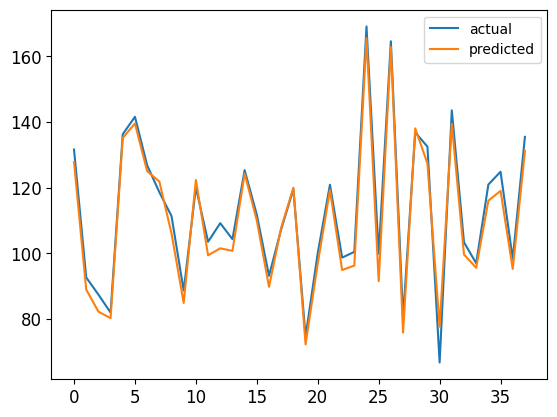

In [40]:
plt.plot(y_test, label = 'actual')
plt.plot(y_pred, label = 'predicted')
plt.legend()

plt.show()

# Conv1D

In [41]:
model = keras.models.Sequential([
    keras.layers.Conv1D(filters=20, kernel_size=3, strides=1, padding="valid", input_shape=[9, 1]),
    keras.layers.GRU(32, activation='relu', return_sequences=True),
    keras.layers.GRU(32, activation='relu', return_sequences=False),
    keras.layers.Dense(1, activation=None)
])

In [42]:
np.random.seed(42)
tf.random.set_seed(42)

model.compile(loss="mse", optimizer='Adam')

history = model.fit(X_train, y_train, epochs=30)

Epoch 1/30
3/3 [==============================] - 2s 6ms/step - loss: 13632.7109
Epoch 2/30
3/3 [==============================] - 0s 4ms/step - loss: 11824.6553
Epoch 3/30
3/3 [==============================] - 0s 6ms/step - loss: 10919.7510
Epoch 4/30
3/3 [==============================] - 0s 6ms/step - loss: 9976.8301
Epoch 5/30
3/3 [==============================] - 0s 6ms/step - loss: 8870.5146
Epoch 6/30
3/3 [==============================] - 0s 6ms/step - loss: 7630.6523
Epoch 7/30
3/3 [==============================] - 0s 6ms/step - loss: 6208.9238
Epoch 8/30
3/3 [==============================] - 0s 6ms/step - loss: 4809.7012
Epoch 9/30
3/3 [==============================] - 0s 20ms/step - loss: 3427.6587
Epoch 10/30
3/3 [==============================] - 0s 8ms/step - loss: 2001.5841
Epoch 11/30
3/3 [==============================] - 0s 6ms/step - loss: 534.3935
Epoch 12/30
3/3 [==============================] - 0s 8ms/step - loss: 45.0377
Epoch 13/30
3/3 [===================

In [43]:
#Predict:
y_pred = model.predict(X_test)

2/2 [==============================] - 0s 4ms/step


In [44]:
mean_squared_error(y_test, y_pred)

13.970194557528723

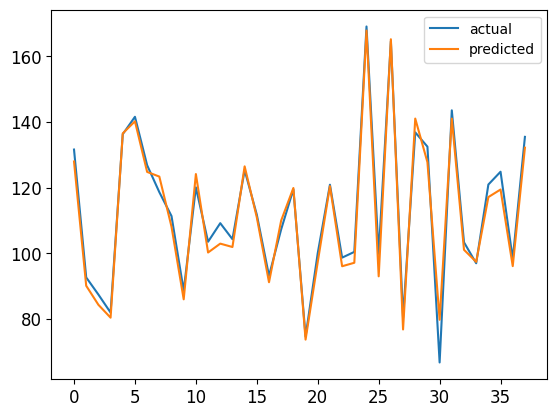

In [45]:
plt.plot(y_test, label = 'actual')
plt.plot(y_pred, label = 'predicted')
plt.legend()

plt.show()

Conv1D is performing really good and it is the best model with low mean square error.